<a href="https://colab.research.google.com/github/prax1807/Git-to-do/blob/main/Danucore_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danucore - Recruitment Exercise

In this Jupyter notebook, we present a brief exercise related to our work at Danucore. This comprises two questions: the first involves analysis of PV data; and the second involves use of a publicly-available large language model of your choice.

These exercises should take a couple of hours at most, and we would like you to use this exercise to demonstrate your thinking around the problem.

## Q1 - Predicting PV Output

The accompanying CSV file contains daily PV output data and weather data collected from a single location, covering a period of 50 months. You may assume that this data has been collected using sensors installed at the location. The variables included in the data are as follows:

 - `precip`: daily aggregate liquid precipitation;
 - `cloud cover`: percentage of the visible sky that is covered by cloud;
 - `solar radiation`: solar radiation power (in W/m$^2$);
 - `humidity`: relative humidity (expressed as a percentage);
 - `pressure`: sea level atmospheric pressure (in millibars);
 - `UV index`: an indicator for the level of daily UV exposure, based on the amount of short-wave solar radiation and dependent on the cloud cover, type of cloud, altitude and time of year; 0 represents no exposure, 10 represents a high level of exposure;
 - `temp min`: minimum daily temperature
 - `temp max`: maximum daily temperature
 - `solar energy`: daily aggregate energy from the sun (in MJ/m$^2$)

- `PV output`: daily aggregate energy output (in kWh) from a PV array with maximum capacity of 1 kWp
     
Suppose we wish to use the first nine variables (or some subset of these) to predict the daily aggregate solar energy output given by the tenth variable. Suggest and implement a method for doing this: use the first two years of data for any model fitting, and use the final two months to illustrate your model's predictive ability.

If you are using ML methods, these do not need to be fully optimised, though you should demonstrate best practice in any model fitting procedures you implement. All implementation should be carried out in Python and within this notebook.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/solarPower_50m.csv'
data = pd.read_csv(file_path)

In [3]:
data

,Unnamed: 0,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,NaN,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712
...,...,...,...,...,...,...,...,...,...,...,...
788,2022-01-27,0.605,64.0,23.6,91.7,1030.8,1.0,2.0,10.4,2.1,0.612
789,2022-01-28,0.191,61.8,40.8,95.9,1035.6,2.0,0.6,9.1,3.5,0.401
790,2022-01-29,1.226,77.8,31.0,93.5,1031.9,1.0,3.5,10.2,2.6,0.700
791,2022-01-30,0.124,38.8,53.9,88.9,1031.4,3.0,0.4,8.0,4.7,1.313


In [4]:
data['Date'] = pd.to_datetime(data['Unnamed: 0'])

In [5]:
import plotly.express as px

fig = px.line(data, x='Date', y="PV output")
fig.show()

In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
precip,0
cloud cover,0
solar radiation,33
humidity,0
pressure,1
UV index,0
temp min,0
temp max,0
solar energy,0


In [7]:
data.drop(columns=['Unnamed: 0','solar radiation','pressure'], inplace=True)

In [8]:
data.corr("spearman")

,precip,cloud cover,humidity,UV index,temp min,temp max,solar energy,PV output,Date
precip,1.000000,0.350097,0.551634,-0.403641,0.055653,-0.227331,-0.429257,-0.448839,-0.049496
cloud cover,0.350097,1.000000,0.669564,-0.584988,0.163607,-0.175153,-0.570493,-0.469125,0.084810
humidity,0.551634,0.669564,1.000000,-0.707420,0.006118,-0.312794,-0.732311,-0.688060,0.111372
UV index,-0.403641,-0.584988,-0.707420,1.000000,0.320654,0.633322,0.960656,0.888311,-0.063460
temp min,0.055653,0.163607,0.006118,0.320654,1.000000,0.840782,0.371307,0.439641,0.105157
temp max,-0.227331,-0.175153,-0.312794,0.633322,0.840782,1.000000,0.688221,0.712708,0.045154
solar energy,-0.429257,-0.570493,-0.732311,0.960656,0.371307,0.688221,1.000000,0.940412,-0.086542
PV output,-0.448839,-0.469125,-0.688060,0.888311,0.439641,0.712708,0.940412,1.000000,-0.019515
Date,-0.049496,0.084810,0.111372,-0.063460,0.105157,0.045154,-0.086542,-0.019515,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

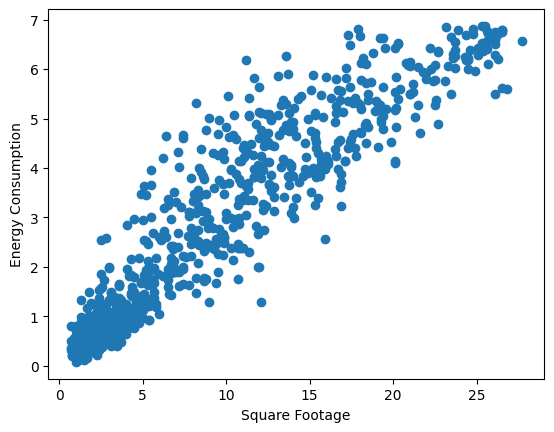

In [9]:
import matplotlib.pyplot as plt
X=data[["solar energy"]]
Y=data["PV output"]
plt.scatter(X,Y)
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.show

In [10]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, 8)),
    Dense(10, activation='relu'),
    Dense(1)  # Output layer (adjust as needed)
])

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['mse'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 10)               │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,321 (48.13 KB)

 Trainable params: 12,321 (48.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:

split_date = data['Date'].max() - pd.DateOffset(months=2)

# Split the data into training and testing sets
train_data = data[data['Date'] < split_date]
test_data = data[data['Date'] >= split_date]

# Print the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (730, 9)
Testing data shape: (63, 9)


In [12]:
X_train=train_data.drop(columns=['PV output','Date'])
Y_train=train_data["PV output"]
X_test=test_data.drop(columns=['PV output','Date'])
Y_test=test_data["PV output"]
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (730, 7)
Testing data shape: (63, 7)


In [13]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Reshape the input data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((730,1,7))
X_test = X_test.reshape((63,1,7))



In [14]:
X_train.shape

(730, 1, 7)

In [15]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 48.4480 - mse: 13.4131
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.3550 - mse: 13.1850
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.4132 - mse: 12.8029
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.7379 - mse: 12.9186
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.8266 - mse: 12.1721
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.6845 - mse: 13.4545
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.2783 - mse: 12.7663
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.9201 - mse: 13.2353
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.2045 - mse: 12.7724
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.8334 - mse: 13.3402


In [16]:

eval = model.evaluate(X_test, Y_test,batch_size=32)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.2721 - mse: 0.5333
Test Loss: 10.97309684753418
Test Accuracy: 0.609688401222229


  ## Q2 - Extracting data using LLMs

The accompanying PDF file is a data sheet that gives specifications for a number of hardware products available from GivEnergy. Use an open source Large Language Model of your choice to run inference optimally on a single or multi-node cluster to extract the data from this pdf to the best of its ability. Please provide a record of the prompts you use in your interaction with the LLM.

